# Autoencoder
Applications to image denoising

In [1]:
from keras.datasets import mnist
import numpy as np 
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

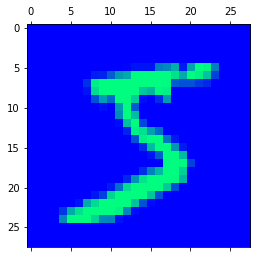

In [5]:
plt.matshow(X_train[0], cmap='winter')

In [6]:
# the size of the middle layer, the latent representation of 32 neurons
encoding_dim = 32 

In [7]:
input_img = Input(shape=(784, )) # 784 = 28*28

# The latent representation layer
encoded = Dense(encoding_dim, activation='relu')(input_img)

# decoder part = the output layer
# same size as the input
decoded = Dense(784, activation='sigmoid')(encoded)

# complete model composed of three layers
autoenc = Model(input_img, decoded) # entrée et sortie du model

# sub-model of two first layers
encodeur = Model(input_img, encoded)

# production of encoded data that will be entered in the decoder
encoded_input = Input(shape=(encoding_dim, ))

# the last layer of three in autoenc
decoded_layer = autoenc.layers[-1]

# Construction of the decoder model which includes two last layers
decodeur = Model(encoded_input, decoded_layer(encoded_input))

In [8]:
autoenc.compile(optimizer='adam', loss='binary_crossentropy')

In [9]:
# Preparation of the data
# normalization in [0,1]
# less precision (32 bits) faster calculation
X_train_scaled = X_train.astype('float32') / 255
X_test_scaled = X_test.astype('float32') / 255

In [10]:
# Flatten
X_train_flat = X_train_scaled.reshape(len(X_train), 784)
X_test_flat = X_test_scaled.reshape(len(X_test), 784)

In [11]:
X_train_flat.shape

(60000, 784)

In [12]:
X_test_flat.shape

(10000, 784)

In [13]:
autoenc.fit(X_train_flat,
            X_train_flat, # "y_train" = X_train for autoencodeur
            # principle of autoencoder : 
            # Output we want to represent the image similar to the original
            epochs=10,
            batch_size=100,
            shuffle=True
           )

Epoch 1/10
600/600 [==============================] - 5s 6ms/step - loss: 0.2158A
Epoch 2/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1337
Epoch 3/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1126
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1027
Epoch 5/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0979
Epoch 6/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0958
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0949
Epoch 8/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0944
Epoch 9/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0941
Epoch 10/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0939


In [14]:
images_coded = encodeur.predict(X_test_flat)

images_decoded = decodeur.predict(images_coded)

In [15]:
images_coded.shape

(10000, 32)

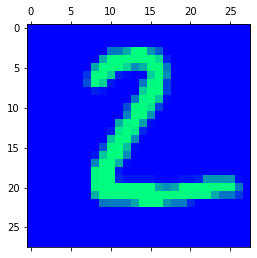

In [16]:
plt.matshow(X_test[1], cmap="winter")

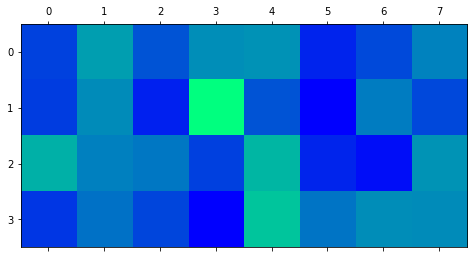

In [17]:
plt.matshow(images_coded[1].reshape(4,8), cmap="winter")

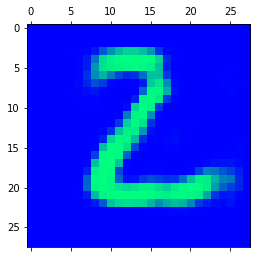

In [18]:
plt.matshow(images_decoded[1].reshape(28,28), cmap="winter")

In [19]:
# compression rate
32 / 784

0.04081632653061224

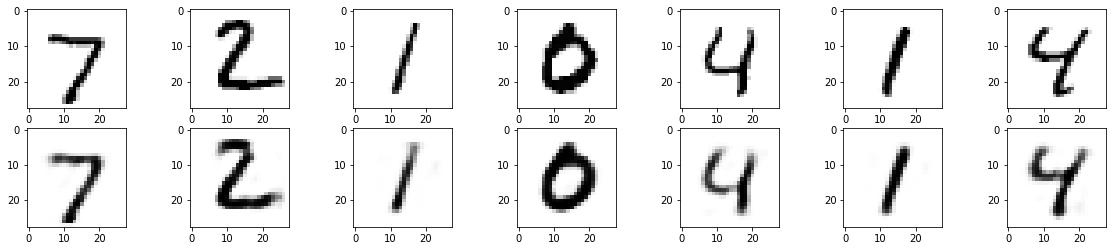

In [20]:
n = 7
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    ax.imshow(X_test[i].reshape(28,28), cmap='gray_r')
    
    ax = plt.subplot(2, n, i+1+n)
    ax.imshow(images_decoded[i].reshape(28,28), cmap="gray_r")
plt.show()

# Application to denoising

In [21]:
# Creating noisy images
noise_factor = 0.2

X_train_noisy = X_train_flat + noise_factor*np.random.normal(loc=0.0,
                                                             scale=1.0,
                                                             size=X_train_flat.shape)

X_test_noisy = X_test_flat + noise_factor*np.random.normal(loc=0.0,
                                                             scale=1.0,
                                                             size=X_test_flat.shape)

# Recadrage dans [0,1]
X_train_noisy = np.clip(X_train_noisy, 0.0, 1.0)
X_test_noisy = np.clip(X_test_noisy, 0.0, 1.0)

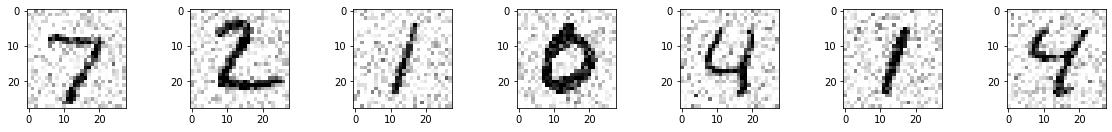

In [22]:
n = 7
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    ax.imshow(X_test_noisy[i].reshape(28,28), cmap='gray_r')
plt.show()

In [23]:
# Denoising with an autoencoder
images_coded_ns = encodeur.predict(X_test_noisy)

images_decoded_ns = decodeur.predict(images_coded_ns)


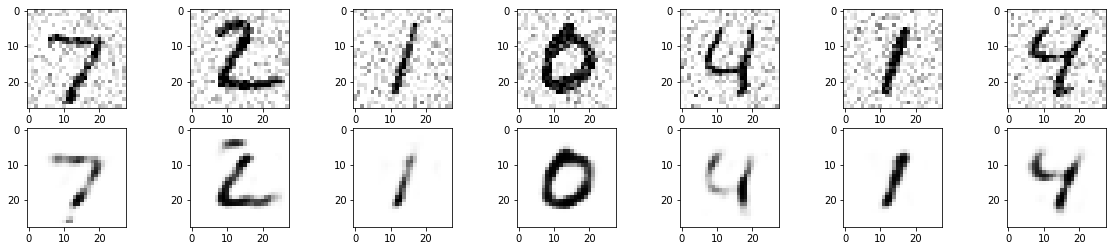

In [24]:
n = 7
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    ax.imshow(X_test_noisy[i].reshape(28,28), cmap='gray_r')
    
    ax = plt.subplot(2, n, i+1+n)
    ax.imshow(images_decoded_ns[i].reshape(28,28), cmap="gray_r")
plt.show()